In [220]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [221]:
crime=pd.read_csv("crime_data.csv")

In [222]:
crime.rename( columns={'Unnamed: 0':'City'}, inplace=True )

In [223]:
crime

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [224]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [225]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


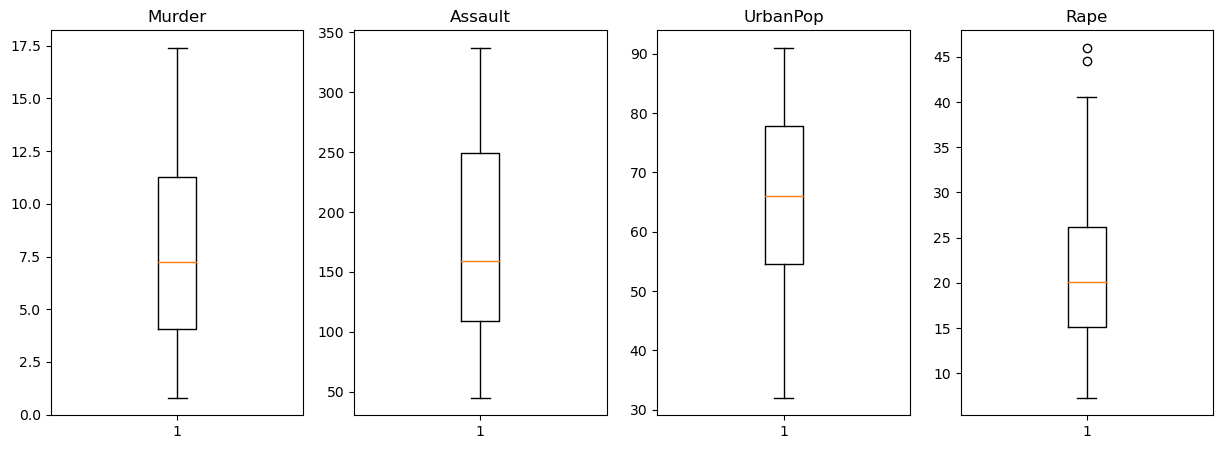

In [226]:
plt.subplots(figsize=(15,5))
plt.subplot(1,4,1)
plt.boxplot(crime.Murder)
plt.title('Murder')
plt.subplot(1,4,2)
plt.boxplot(crime["Assault"])
plt.title('Assault')
plt.subplot(1,4,3)
plt.boxplot(crime.UrbanPop)
plt.title('UrbanPop')
plt.subplot(1,4,4)
plt.boxplot(crime.Rape)
plt.title("Rape")
plt.show()

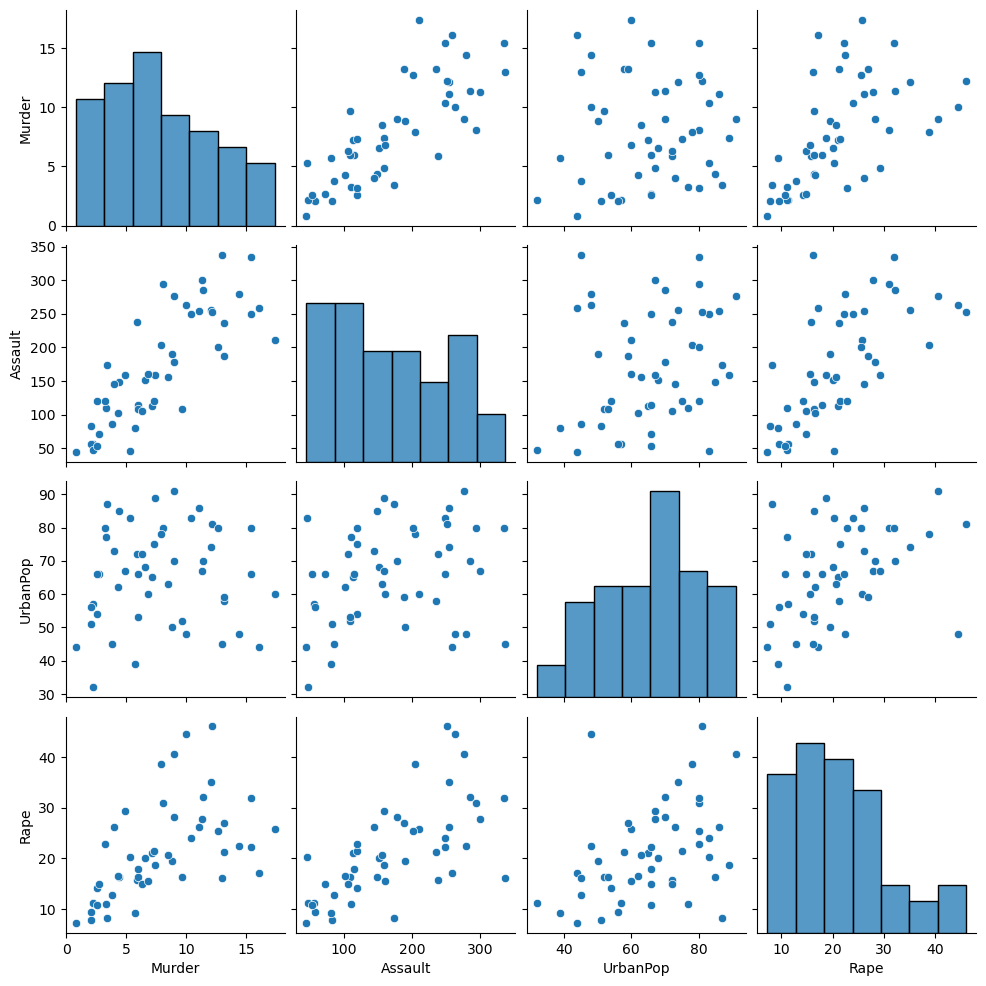

In [227]:
sn.pairplot(crime)

In [228]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


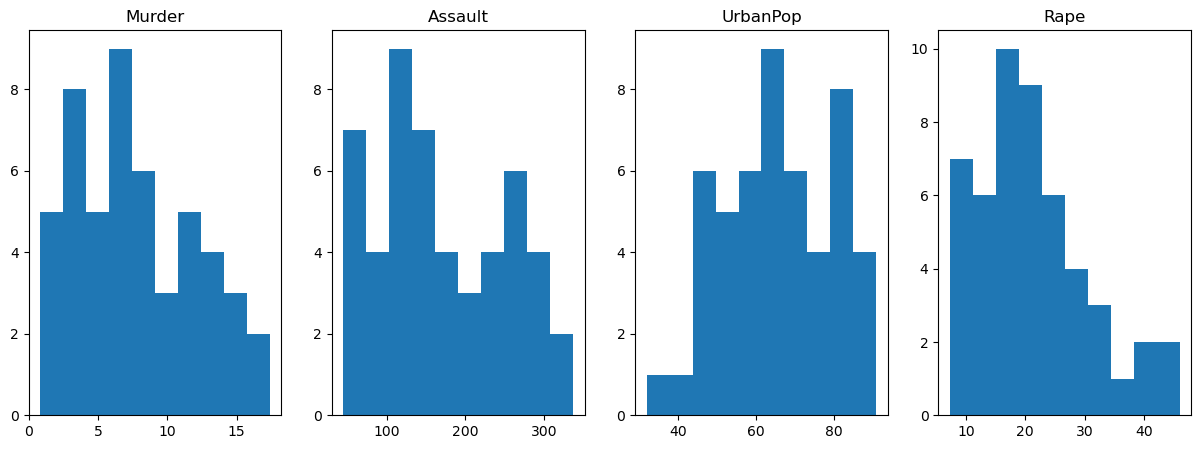

In [229]:
plt.subplots(figsize=(15,5))
plt.subplot(1,4,1)
plt.hist(crime.Murder)
plt.title('Murder')
plt.subplot(1,4,2)
plt.hist(crime["Assault"])
plt.title('Assault')
plt.subplot(1,4,3)
plt.hist(crime.UrbanPop)
plt.title('UrbanPop')
plt.subplot(1,4,4)
plt.hist(crime.Rape)
plt.title("Rape")
plt.show()

In [230]:
crime.skew()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14404\4102739717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler=StandardScaler()

In [233]:
crime1=pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]),columns=crime.columns[1:])
crime1

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [234]:
import scipy.cluster.hierarchy as sch


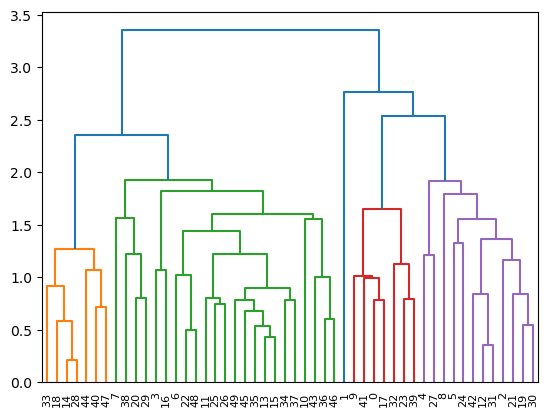

In [146]:
dendogram=sch.dendrogram(sch.linkage(crime1,method="average"))

In [147]:
hc=AgglomerativeClustering(n_clusters=4,linkage='average')

In [148]:
hc

AgglomerativeClustering(linkage='average', n_clusters=4)

In [149]:
y_hc=hc.fit_predict(crime1)
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [150]:
cluster=pd.DataFrame(y_hc)
cluster

,0
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [151]:
crime.insert(loc=5,column="Cluster",value=cluster)

In [152]:
crime

,City,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [153]:
wscc=[]
for i in range (1,10):
    kmean=KMeans(n_clusters=i,random_state=21)
    kmean.fit(crime1)
    wscc.append(kmean.inertia_)

C:\Users\Dell\anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [154]:
wscc

[200.0,
 104.96163315756871,
 79.92170303159772,
 57.55425863091104,
 49.99384281326749,
 44.07128085388708,
 39.76024721413905,
 35.73603921930647,
 32.721511277334244]

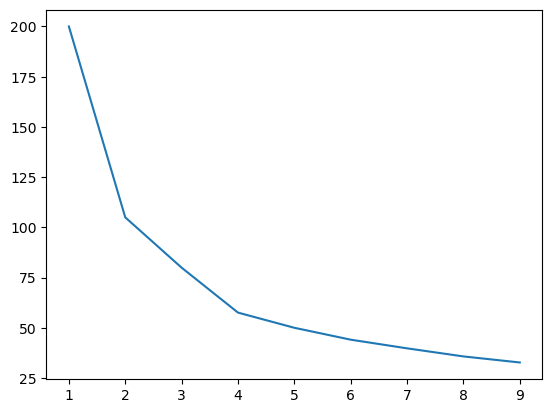

In [155]:
plt.plot(range(1,10),wscc)

In [156]:
####from elbow method number of clusters is 4

In [157]:
from sklearn.cluster import KMeans
kmean_cluster=KMeans(n_clusters=4,random_state=21)
kmean_cluster.fit(crime1)

KMeans(n_clusters=4, random_state=21)

In [158]:
kmeancluster=pd.DataFrame(kmean_cluster.labels_)
kmeancluster

,0
0,1
1,3
2,3
3,1
4,3
5,3
6,0
7,0
8,3
9,1


In [159]:
kmeancrime=crime.insert(loc=1,column="kmeanCluster",value=kmeancluster)

In [160]:
kmeancrime

# DBSCAN 

In [264]:
dbscan=DBSCAN(eps=1.2,min_samples=5)
dbscan.fit(crime1)

DBSCAN(eps=1.2)

In [265]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [266]:
a=pd.DataFrame(dbscan.labels_,columns=["cluster"])
a

,cluster
0,0
1,-1
2,-1
3,1
4,-1
5,-1
6,1
7,1
8,-1
9,0


In [267]:
clustered=pd.concat([crime,a],axis=1)

In [268]:
clustered

,City,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [269]:
clustered_new=clustered[clustered["cluster"]==-1]
clustered_new.shape

(13, 6)

In [270]:
crime.shape

(50, 5)

In [272]:
13*100/50

26.0

In [ ]:
##noise present in this clustering is 26%